In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Charger le dataframe
df = pd.read_csv("Styles.csv")


In [3]:
#afficher les 5 premieres lignes de dataframe
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN


In [4]:
print(df.shape)
print(df.info())


(44446, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
 10  Unnamed: 10         22 non-null     object 
 11  Unnamed: 11         2 non-null      object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB
None


In [5]:
df['year'].unique()

array([2011., 2012., 2016., 2017., 2015., 2014., 2010., 2013., 2018.,
       2019., 2007., 2009., 2008.,   nan])

In [6]:
df=df.drop(['Unnamed: 10','Unnamed: 11'], axis = 1)

In [7]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [8]:
# Verification des valeurs nulles dans la base de données 
df.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [9]:
# Nettoyage des valeurs manquantes

df["baseColour"].fillna(value=df["baseColour"].mode(), inplace=True)
df["baseColour"] = df["baseColour"].astype(str)

df["season"].fillna(value=df["season"].mode(), inplace=True)
df["season"] = df["season"].astype(str)

df["usage"].fillna(value=df["usage"].mode(), inplace=True)
df["usage"] = df["usage"].astype(str)

df["year"].fillna(value=df["year"].mean(), inplace=True)
df["year"] = df["year"].astype(float)

df = df.drop("productDisplayName", axis=1)



In [10]:
df.isna().sum()

id                0
gender            0
masterCategory    0
subCategory       0
articleType       0
baseColour        0
season            0
year              0
usage             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              44446 non-null  int64  
 1   gender          44446 non-null  object 
 2   masterCategory  44446 non-null  object 
 3   subCategory     44446 non-null  object 
 4   articleType     44446 non-null  object 
 5   baseColour      44446 non-null  object 
 6   season          44446 non-null  object 
 7   year            44446 non-null  float64
 8   usage           44446 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.1+ MB


Notre dataframe est à présent nettoyé

In [12]:
# Recherchons les valeurs dupliquées
df.duplicated().sum()

0

In [13]:
# Informations statistiques
df.describe()

,id,year
count,44446.000000,44446.000000
mean,29692.631350,2012.805940
std,17048.234982,2.126377
min,1163.000000,2007.000000
25%,14770.250000,2011.000000
50%,28609.500000,2012.000000
75%,44678.750000,2015.000000
max,60000.000000,2019.000000


[Text(0, 0.5, 'id'), Text(0.5, 1.0, 'Box Plot On Count')]

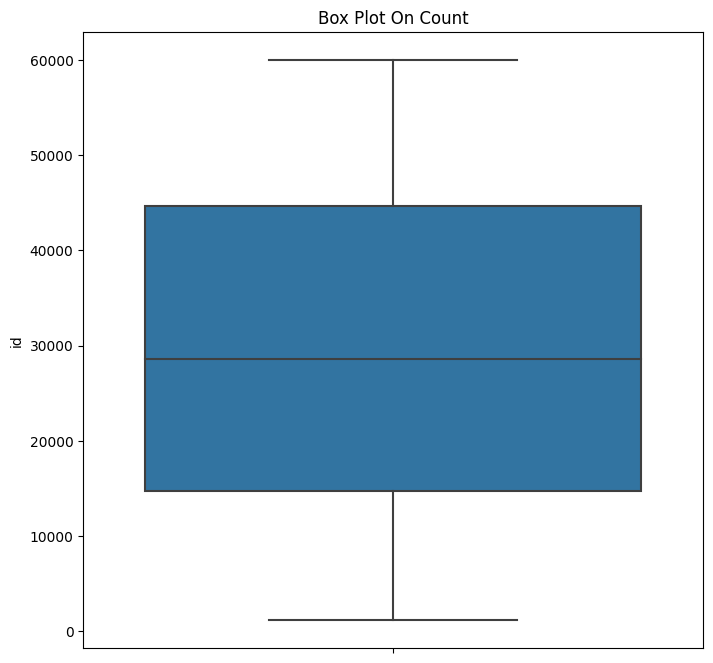

In [14]:

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data=df,y="id",orient="v",ax=axes)

axes.set(ylabel='id',title="Box Plot On Count")

In [15]:
# repartition des genres
import plotly.express as px
fig = px.pie(df, df['gender'],color_discrete_sequence=px.colors.sequential.dense, opacity=0.9)
fig.show()


<AxesSubplot: >

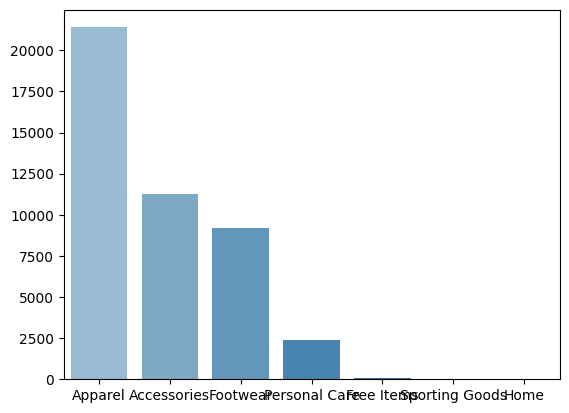

In [16]:
# répartition des catégories
catcounts = df['masterCategory'].value_counts()
sns.barplot(x=catcounts.index, y=catcounts.values, palette="Blues_d")

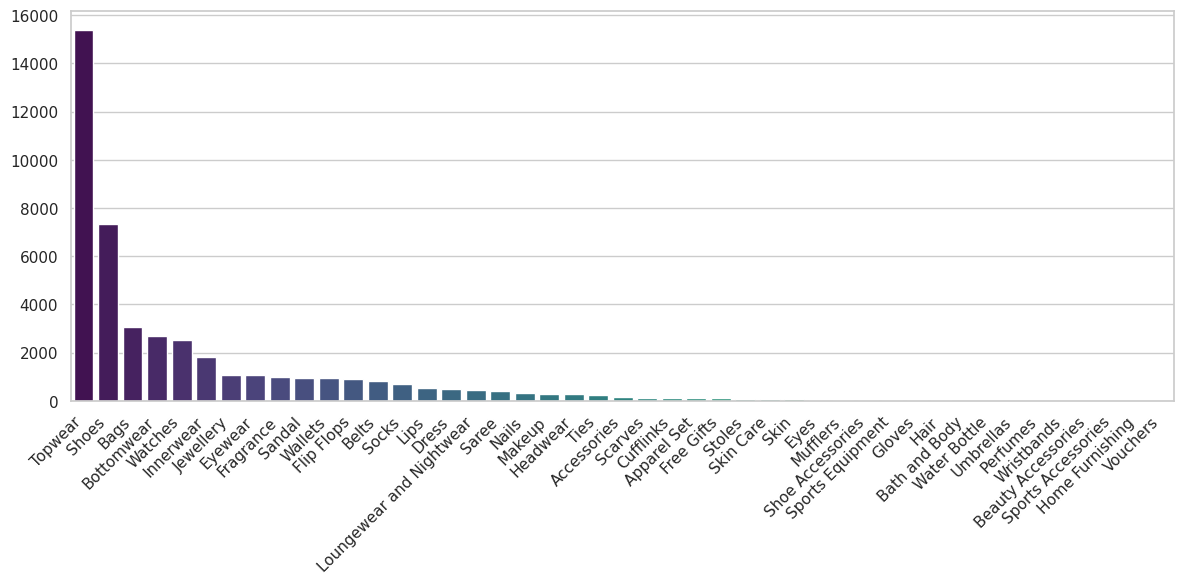

In [17]:
#repartition des sous catégories
catcounts = pd.value_counts(df['subCategory'])
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=catcounts.index, y=catcounts.values, ax=ax, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

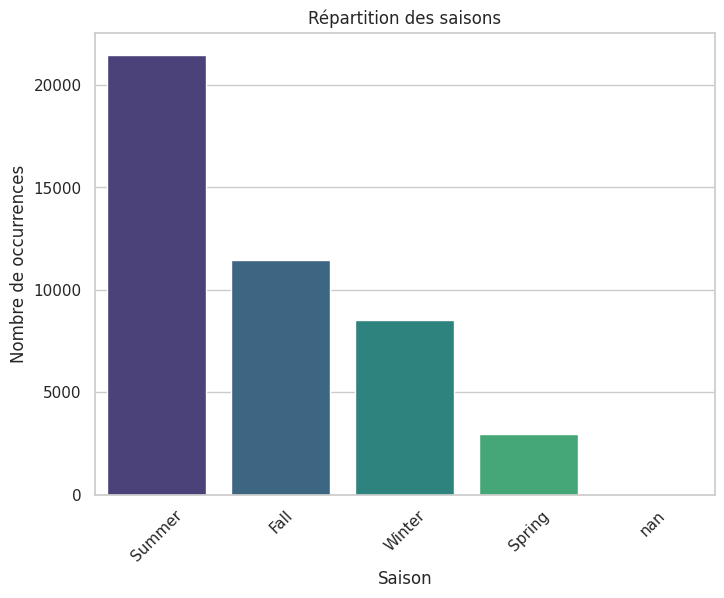

In [18]:
# Repartition des saisons
import seaborn as sns
import matplotlib.pyplot as plt

seasons = df['season'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=seasons.index, y=seasons.values, palette="viridis")
plt.xlabel('Saison')
plt.ylabel('Nombre de occurrences')
plt.title('Répartition des saisons')
plt.xticks(rotation=45)
plt.show()

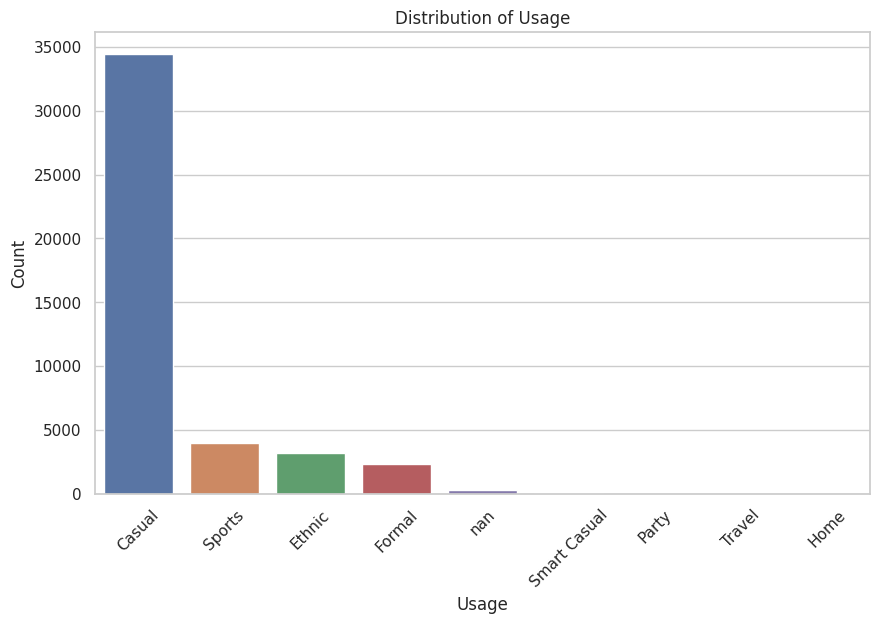

In [19]:
# repartition des usages

catcounts = df['usage'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=catcounts.index, y=catcounts.values)
plt.xlabel('Usage')
plt.ylabel('Count')
plt.title('Distribution of Usage')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Convertir la colonne "year" en type datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Vérifier le nouveau type de données de la colonne
print(df['year'].dtype)

datetime64[ns]


In [21]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011-01-01,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012-01-01,Casual
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016-01-01,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011-01-01,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012-01-01,Casual


In [22]:
df['year'] = df['year'].dt.year

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              44446 non-null  int64 
 1   gender          44446 non-null  object
 2   masterCategory  44446 non-null  object
 3   subCategory     44446 non-null  object
 4   articleType     44446 non-null  object
 5   baseColour      44446 non-null  object
 6   season          44446 non-null  object
 7   year            44446 non-null  int64 
 8   usage           44446 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


In [24]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual


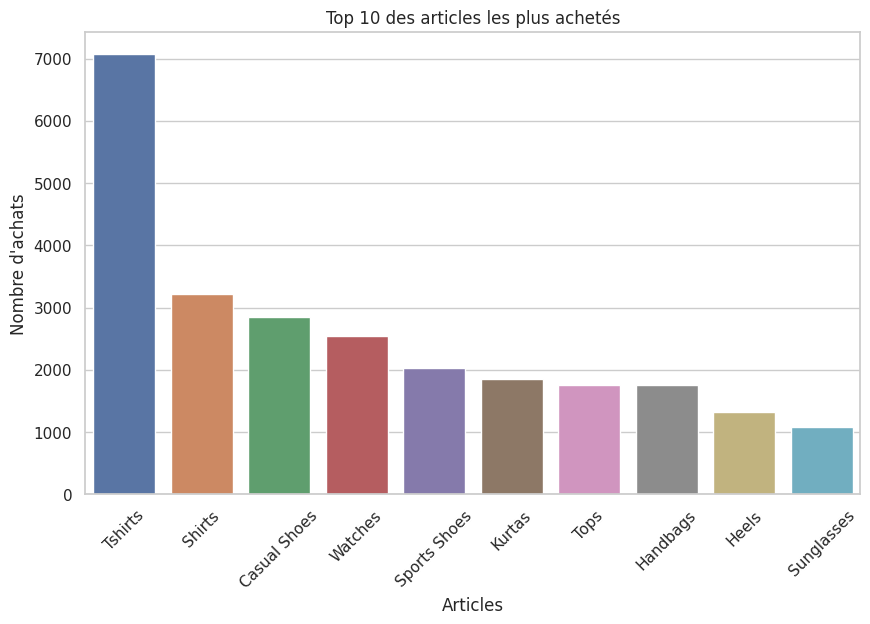

In [25]:
# Top 10 des articles les plus achetés

# Calculer le nombre total d'achats pour chaque article
article_counts = df['articleType'].value_counts()

# Obtenir le top 10 des articles les plus achetés
top_10_articles = article_counts.head(10)

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer le graphique à barres avec Seaborn
sns.barplot(x=top_10_articles.index, y=top_10_articles.values, ax=ax)
plt.xlabel('Articles')
plt.ylabel('Nombre d\'achats')
plt.title('Top 10 des articles les plus achetés')

# Faire pivoter les étiquettes des articles pour faciliter la lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

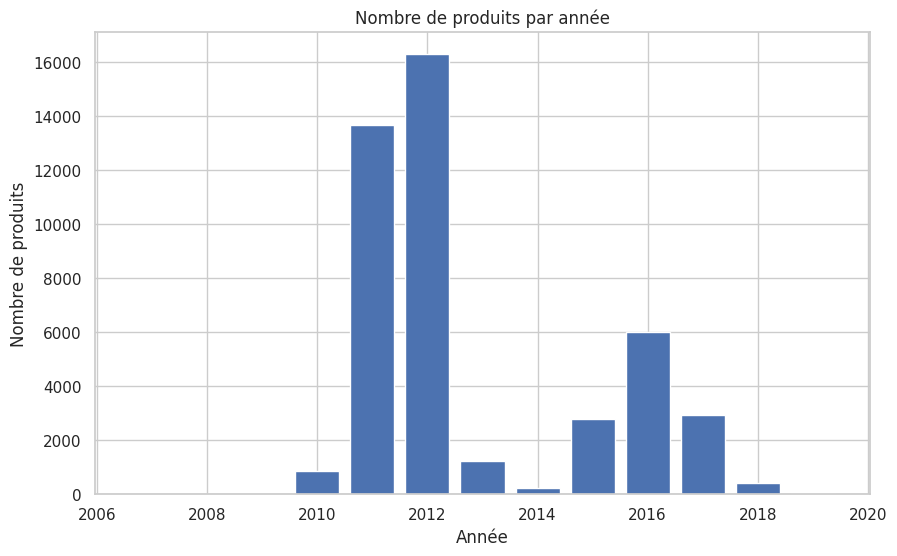

In [26]:
# Compter le nombre de produits par année
product_counts_by_year = df.groupby('year')['articleType'].count()

# Créer un histogramme pour visualiser le nombre de produits par année
plt.figure(figsize=(10, 6))
plt.bar(product_counts_by_year.index, product_counts_by_year.values)
plt.xlabel('Année')
plt.ylabel('Nombre de produits')
plt.title('Nombre de produits par année')

# Afficher l'histogramme
plt.show()

In [27]:
# Quel sexe a le plus fait des achats en 2019
df[df['year'] == 2019].groupby('gender')['articleType'].max()

gender
Women    Nail Polish
Name: articleType, dtype: object

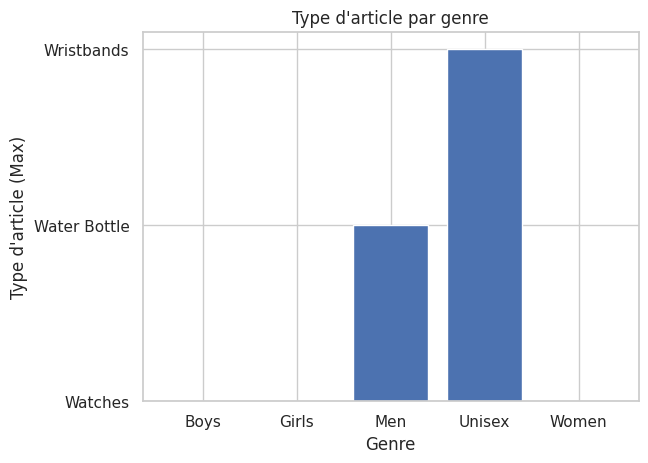

In [28]:
# Filtrer les données pour l'année 2019
df_2019 = df[df['year'] == 2019]

# Regrouper par genre et obtenir la valeur maximale de 'articleType' pour chaque groupe
result = df.groupby('gender')['articleType'].max()

# Créer le graphe à barres
plt.bar(result.index, result.values)

# Ajouter des titres et des labels aux axes
plt.xlabel('Genre')
plt.ylabel("Type d'article (Max)")
plt.title("Type d'article par genre")

# Afficher le graphe
plt.show()


In [29]:
# Filtrer les données pour ne garder que celles de l'année 2019
df_2019 = df[df['year'] == 2019]

In [30]:
# Grouper les données par sexe et compter le nombre de lignes pour chaque groupe
purchase_count_by_gender = df_2019.groupby('gender')['articleType'].count()

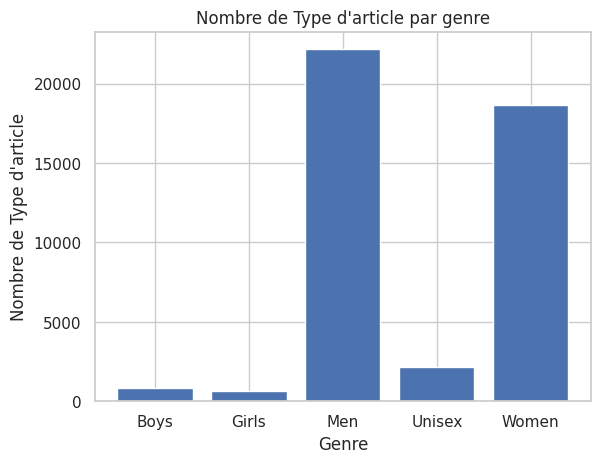

In [31]:
# Regrouper par genre et obtenir le nombre de 'articleType' pour chaque groupe
result1 = df.groupby('gender')['articleType'].count()

# Créer le graphe à barres
plt.bar(result1.index, result1.values)

# Ajouter des titres et des labels aux axes
plt.xlabel('Genre')
plt.ylabel("Nombre de Type d'article")
plt.title("Nombre de Type d'article par genre")

# Afficher le graphe
plt.show()

In [32]:
purchase_count_by_gender

gender
Women    33
Name: articleType, dtype: int64

In [33]:
# Pour quel usage
df.groupby('usage')['articleType'].max()

usage
Casual              Wristbands
Ethnic               Waistcoat
Formal                 Watches
Home            Cushion Covers
Party                  Watches
Smart Casual           Watches
Sports              Wristbands
Travel               Rucksacks
nan                    Wallets
Name: articleType, dtype: object

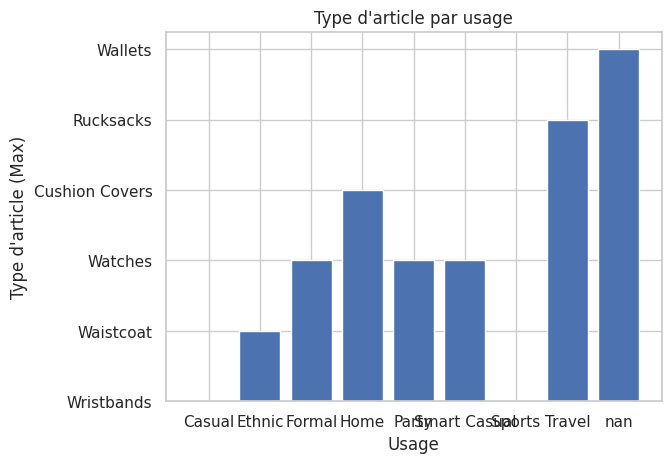

In [34]:
# Regrouper par genre et obtenir la valeur maximale de 'usage' pour chaque 'articleType'
result2 = df.groupby('usage')['articleType'].max()

# Créer le graphe à barres
plt.bar(result2.index, result2.values)

# Ajouter des titres et des labels aux axes
plt.xlabel('Usage')
plt.ylabel("Type d'article (Max)")
plt.title("Type d'article par usage")

# Afficher le graphe
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b676dad-e098-4ec8-b5a3-837be1c21a57' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>